Group 3

Harrshit Limbodia	2019B4A40815H

Ninaad Pinakin Thakkar 	2019B4A40872H

Gautam Gupta	2019B2A41118H

Karan Moza	2019B4A71372H

Khushi Khanna 	2019B4A10850H

Aryaa Bharani	2019B1A11556H

Arnav Bhatara	2019B4AA1304H

Sankalp Bhadoria	2019B3AA1269H

Abhimanyu Singh Rana	2019B3A80701H

Event: 8th November 2016 Demonetization


In [ ]:
#Install required libraries
!pip install yfinance
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [ ]:
iocdf = yf.download('IOC.NS', 
                      start='2015-12-16', 
                      end='2017-01-04', 
                      progress=False
)
iocdf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-16,70.166664,71.933334,70.166664,70.958336,45.638889,8238984
2015-12-17,71.358330,71.875000,71.041664,71.675003,46.099831,11092848
2015-12-18,72.150002,72.608330,70.708336,70.933334,45.622814,9321792
2015-12-21,72.000000,73.266663,71.000000,72.574997,46.678692,5685144
2015-12-22,72.750000,73.000000,71.766663,72.108330,46.378540,4945674


In [ ]:
nifty_df = yf.download('^NSEI',start='2015-12-16', 
                      end='2017-01-04', 
                      progress=False
)
nifty_df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-16,7725.250000,7776.600098,7715.750000,7750.899902,7750.899902,154300
2015-12-17,7783.049805,7852.899902,7737.549805,7844.350098,7844.350098,175900
2015-12-18,7828.899902,7836.149902,7753.350098,7761.950195,7761.950195,191400
2015-12-21,7745.649902,7840.750000,7733.450195,7834.450195,7834.450195,126300
2015-12-22,7829.399902,7846.299805,7776.850098,7786.100098,7786.100098,125700


In [ ]:
#Calculate Log returns
nifty_df['Return_NIFTY'] = np.log(nifty_df['Adj Close']/nifty_df['Adj Close'].shift(1))
print(nifty_df['Return_NIFTY']) 

Date
2015-12-16         NaN
2015-12-17    0.011985
2015-12-18   -0.010560
2015-12-21    0.009297
2015-12-22   -0.006191
                ...   
2016-12-28    0.000249
2016-12-29    0.008520
2016-12-30    0.010093
2017-01-02   -0.000770
2017-01-03    0.001558
Name: Return_NIFTY, Length: 257, dtype: float64


In [ ]:
#removing one enties from NIFTY 50 data
nifty_df.dropna(inplace=True)

In [ ]:
iocdf['Return_IOC'] = np.log(iocdf['Adj Close']/iocdf['Adj Close'].shift(1))
print(iocdf['Return_IOC']) 

Date
2015-12-16         NaN
2015-12-17    0.010049
2015-12-18   -0.010401
2015-12-21    0.022880
2015-12-22   -0.006451
                ...   
2016-12-28   -0.003473
2016-12-29    0.021123
2016-12-30    0.006482
2017-01-02    0.007357
2017-01-03    0.052933
Name: Return_IOC, Length: 259, dtype: float64


In [ ]:
#removing one enties from company data
iocdf.dropna(inplace=True)

In [ ]:
iocdf

,Open,High,Low,Close,Adj Close,Volume,Return_IOC
Date,,,,,,,
2015-12-17,71.358330,71.875000,71.041664,71.675003,46.099831,11092848,0.010049
2015-12-18,72.150002,72.608330,70.708336,70.933334,45.622814,9321792,-0.010401
2015-12-21,72.000000,73.266663,71.000000,72.574997,46.678692,5685144,0.022880
2015-12-22,72.750000,73.000000,71.766663,72.108330,46.378540,4945674,-0.006451
2015-12-23,72.000000,72.800003,71.925003,72.183334,46.426788,4580676,0.001040
...,...,...,...,...,...,...,...
2016-12-28,106.349998,107.116669,105.183334,105.400002,69.821884,13755060,-0.003473
2016-12-29,105.500000,108.383331,105.500000,107.650002,71.312386,26576670,0.021123
2016-12-30,107.650002,108.983330,106.966667,108.349998,71.776100,8294085,0.006482


In [ ]:
iocreturns = iocdf['Return_IOC']
iocreturns.head()


Date
2015-12-17    0.010049
2015-12-18   -0.010401
2015-12-21    0.022880
2015-12-22   -0.006451
2015-12-23    0.001040
Name: Return_IOC, dtype: float64

In [ ]:
niftyreturns = nifty_df['Return_NIFTY']
niftyreturns.head()

Date
2015-12-17    0.011985
2015-12-18   -0.010560
2015-12-21    0.009297
2015-12-22   -0.006191
2015-12-23    0.010203
Name: Return_NIFTY, dtype: float64

In [ ]:
#Combining the NIFTY 50 and Company returns 
returns = pd.merge(niftyreturns,iocreturns,how='inner',on='Date')
returns.head()

,Return_NIFTY,Return_IOC
Date,,
2015-12-17,0.011985,0.010049
2015-12-18,-0.010560,-0.010401
2015-12-21,0.009297,0.022880
2015-12-22,-0.006191,-0.006451
2015-12-23,0.010203,0.001040


In [ ]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 256 entries, 2015-12-17 to 2017-01-03
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Return_NIFTY  256 non-null    float64
 1   Return_IOC    256 non-null    float64
dtypes: float64(2)
memory usage: 6.0 KB


In [ ]:
nifty_df.shape

(256, 7)

In [ ]:
iocdf

,Open,High,Low,Close,Adj Close,Volume,Return_IOC
Date,,,,,,,
2015-12-17,71.358330,71.875000,71.041664,71.675003,46.099831,11092848,0.010049
2015-12-18,72.150002,72.608330,70.708336,70.933334,45.622814,9321792,-0.010401
2015-12-21,72.000000,73.266663,71.000000,72.574997,46.678692,5685144,0.022880
2015-12-22,72.750000,73.000000,71.766663,72.108330,46.378540,4945674,-0.006451
2015-12-23,72.000000,72.800003,71.925003,72.183334,46.426788,4580676,0.001040
...,...,...,...,...,...,...,...
2016-12-28,106.349998,107.116669,105.183334,105.400002,69.821884,13755060,-0.003473
2016-12-29,105.500000,108.383331,105.500000,107.650002,71.312386,26576670,0.021123
2016-12-30,107.650002,108.983330,106.966667,108.349998,71.776100,8294085,0.006482


In [ ]:
returns.shape

(256, 2)

Regression by Market Model

In [ ]:
x = returns['Return_NIFTY']
y = returns['Return_IOC']
x_sm = sm.add_constant(x)

In [ ]:
#Regression - Market model 
marketmodel = sm.OLS(y,x_sm)

In [ ]:
resultsmm = marketmodel.fit()

In [ ]:
resultsmm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Return_IOC   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     85.68
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           9.14e-18
Time:                        22:45:59   Log-Likelihood:                 687.71
No. Observations:                 256   AIC:                            -1371.
Df Residuals:                     254   BIC:                            -1364.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0018      0.001      1.727      0.085      -0.000       0.004
Return_NIFTY     1.0130      0.109      9.256      0.000       0.797       1.229
==============================================================================
Omnibus:                       18.180   Durbin-Watson:                   2.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.401
Skew:                           0.376   Prob(JB):                     3.39e-08
Kurtosis:                       4.630   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
betaiocmm=resultsmm.params[1]

In [ ]:
resultsmm.f_pvalue

9.144280467492342e-18

In [ ]:
returnsioc=returns

In [ ]:
returnsioc['ER_MM']=returnsioc['Return_NIFTY']*betaiocmm

In [ ]:
returnsioc

,Return_NIFTY,Return_IOC,ER_MM
Date,,,
2015-12-17,0.011985,0.010049,0.012140
2015-12-18,-0.010560,-0.010401,-0.010697
2015-12-21,0.009297,0.022880,0.009418
2015-12-22,-0.006191,-0.006451,-0.006271
2015-12-23,0.010203,0.001040,0.010336
...,...,...,...
2016-12-28,0.000249,-0.003473,0.000252
2016-12-29,0.008520,0.021123,0.008631
2016-12-30,0.010093,0.006482,0.010224


Using CAPM

In [ ]:
rfr=0.02/100

In [ ]:
returnsioc['Rm-Rf']=returnsioc['Return_NIFTY']-rfr

In [ ]:
x = returns['Rm-Rf']
y = returns['Return_IOC']
x_sm = sm.add_constant(x)

In [ ]:
capmmodel = sm.OLS(y,x_sm)

In [ ]:
resultscapm = capmmodel.fit()

In [ ]:
resultscapm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Return_IOC   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     85.68
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           9.14e-18
Time:                        22:46:28   Log-Likelihood:                 687.71
No. Observations:                 256   AIC:                            -1371.
Df Residuals:                     254   BIC:                            -1364.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0020      0.001      1.923      0.056   -4.75e-05       0.004
Rm-Rf          1.0130      0.109      9.256      0.000       0.797       1.229
==============================================================================
Omnibus:                       18.180   Durbin-Watson:                   2.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.401
Skew:                           0.376   Prob(JB):                     3.39e-08
Kurtosis:                       4.630   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
returnsioc['ER_CAPM']=rfr+resultscapm.params[1]*returnsioc['Rm-Rf']

In [ ]:
returnsioc

,Return_NIFTY,Return_IOC,ER_MM,Rm-Rf,ER_CAPM
Date,,,,,
2015-12-17,0.011985,0.010049,0.012140,0.011785,0.012138
2015-12-18,-0.010560,-0.010401,-0.010697,-0.010760,-0.010700
2015-12-21,0.009297,0.022880,0.009418,0.009097,0.009415
2015-12-22,-0.006191,-0.006451,-0.006271,-0.006391,-0.006274
2015-12-23,0.010203,0.001040,0.010336,0.010003,0.010333
...,...,...,...,...,...
2016-12-28,0.000249,-0.003473,0.000252,0.000049,0.000250
2016-12-29,0.008520,0.021123,0.008631,0.008320,0.008628
2016-12-30,0.010093,0.006482,0.010224,0.009893,0.010221


FAMA 3

In [ ]:
famadf=pd.read_csv("C:\\Users\\harrs\\OneDrive\\Desktop\\2021-03_FourFactors_and_Market_Returns_Daily_SurvivorshipBiasAdjusted.csv")

In [ ]:
famadf.set_index('Date',inplace=True)

In [ ]:
famadf

,SMB,HML,WML,MF,RF,days to event
Date,,,,,,
2015-12-16,-0.697017,0.386837,-0.357558,0.447390,0.028099,-220
2015-12-17,-0.102805,1.226592,0.346055,1.263357,0.028256,-219
2015-12-18,0.588487,0.073747,0.526803,-0.667976,0.028256,-218
2015-12-21,0.413700,0.855782,-0.658280,0.708558,0.028256,-217
2015-12-22,0.544714,0.488610,0.026780,-0.394539,0.028256,-216
...,...,...,...,...,...,...
2016-12-29,-0.609323,0.376913,0.296232,1.086604,0.024439,36
2016-12-30,0.292598,0.134040,-0.193442,0.984796,0.024439,37
2017-01-02,0.646568,1.114708,0.634339,0.842830,0.024439,38


In [ ]:
returnsioc

,Return_NIFTY,Return_IOC,ER_MM,Rm-Rf,ER_CAPM
Date,,,,,
2015-12-17,0.011985,0.010049,0.012140,0.011785,0.012138
2015-12-18,-0.010560,-0.010401,-0.010697,-0.010760,-0.010700
2015-12-21,0.009297,0.022880,0.009418,0.009097,0.009415
2015-12-22,-0.006191,-0.006451,-0.006271,-0.006391,-0.006274
2015-12-23,0.010203,0.001040,0.010336,0.010003,0.010333
...,...,...,...,...,...
2016-12-28,0.000249,-0.003473,0.000252,0.000049,0.000250
2016-12-29,0.008520,0.021123,0.008631,0.008320,0.008628
2016-12-30,0.010093,0.006482,0.010224,0.009893,0.010221


In [ ]:
returnsioc.index

DatetimeIndex(['2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31',
               ...
               '2016-12-21', '2016-12-22', '2016-12-23', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2017-01-02', '2017-01-03'],
              dtype='datetime64[ns]', name='Date', length=256, freq=None)

In [ ]:
famadf.index=pd.to_datetime(famadf.index)

In [ ]:
famadf.index

DatetimeIndex(['2015-12-16', '2015-12-17', '2015-12-18', '2015-12-21',
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-28',
               '2015-12-29', '2015-12-30',
               ...
               '2016-12-22', '2016-12-23', '2016-12-26', '2016-12-27',
               '2016-12-28', '2016-12-29', '2016-12-30', '2017-01-02',
               '2017-01-03', '2017-01-04'],
              dtype='datetime64[ns]', name='Date', length=261, freq=None)

In [ ]:
returnsioc=returnsioc.join(famadf)

In [ ]:
returnsioc

,Return_NIFTY,Return_IOC,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,days to event
Date,,,,,,,,,,,
2015-12-17,0.011985,0.010049,0.012140,0.011785,0.012138,-0.102805,1.226592,0.346055,1.263357,0.028256,-219
2015-12-18,-0.010560,-0.010401,-0.010697,-0.010760,-0.010700,0.588487,0.073747,0.526803,-0.667976,0.028256,-218
2015-12-21,0.009297,0.022880,0.009418,0.009097,0.009415,0.413700,0.855782,-0.658280,0.708558,0.028256,-217
2015-12-22,-0.006191,-0.006451,-0.006271,-0.006391,-0.006274,0.544714,0.488610,0.026780,-0.394539,0.028256,-216
2015-12-23,0.010203,0.001040,0.010336,0.010003,0.010333,-0.862967,0.557727,-0.483292,0.892845,0.028256,-215
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,0.000249,-0.003473,0.000252,0.000049,0.000250,0.987619,-0.501282,-0.077401,0.278990,0.024186,35
2016-12-29,0.008520,0.021123,0.008631,0.008320,0.008628,-0.609323,0.376913,0.296232,1.086604,0.024439,36
2016-12-30,0.010093,0.006482,0.010224,0.009893,0.010221,0.292598,0.134040,-0.193442,0.984796,0.024439,37


In [ ]:
X=returnsioc[['Rm-Rf','SMB','HML']]
y=returnsioc['Return_IOC']
X = sm.add_constant(X)

In [ ]:
ff3=sm.OLS(y,X)

In [ ]:
resultsff3=ff3.fit()

In [ ]:
resultsff3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Return_IOC   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     35.47
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           3.70e-19
Time:                        22:48:13   Log-Likelihood:                 695.60
No. Observations:                 256   AIC:                            -1383.
Df Residuals:                     252   BIC:                            -1369.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0019      0.001      1.857      0.065      -0.000       0.004
Rm-Rf          0.8137      0.121      6.746      0.000       0.576       1.051
SMB            0.0028      0.001      2.043      0.042       0.000       0.006
HML            0.0038      0.001      3.471      0.001       0.002       0.006
==============================================================================
Omnibus:                       18.074   Durbin-Watson:                   2.192
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.995
Skew:                           0.412   Prob(JB):                     1.86e-07
Kurtosis:                       4.493   Cond. No.                         126.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
resultsff3.params[3]

0.0037949010225035266

In [ ]:
returnsioc['ER_ff3']=rfr+resultsff3.params[1]*returnsioc['Rm-Rf']+resultsff3.params[2]*returnsioc['SMB']+resultsff3.params[3]*returnsioc['HML']

FAMA FRENCH 4

In [ ]:
X=returnsioc[['Rm-Rf','SMB','HML','MF']]
y=returnsioc['Return_IOC']
X = sm.add_constant(X)

In [ ]:
ff4=sm.OLS(y,X)
resultsff4=ff4.fit()
resultsff4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Return_IOC   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     37.81
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           9.52e-25
Time:                        22:51:33   Log-Likelihood:                 710.87
No. Observations:                 256   AIC:                            -1412.
Df Residuals:                     251   BIC:                            -1394.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.001      1.805      0.072      -0.000       0.004
Rm-Rf         -1.0638      0.352     -3.024      0.003      -1.757      -0.371
SMB           -0.0015      0.002     -0.964      0.336      -0.004       0.002
HML            0.0004      0.001      0.302      0.763      -0.002       0.003
MF             0.0221      0.004      5.640      0.000       0.014       0.030
==============================================================================
Omnibus:                       17.058   Durbin-Watson:                   2.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.468
Skew:                           0.411   Prob(JB):                     1.09e-06
Kurtosis:                       4.378   Cond. No.                         463.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
returnsioc['ER_ff4']=rfr+resultsff4.params[1]*returnsioc['Rm-Rf']+resultsff4.params[4]*returnsioc['MF']

In [ ]:
returnsioc

,Return_NIFTY,Return_IOC,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,days to event,ER_ff3,ER_ff4
Date,,,,,,,,,,,,,
2015-12-17,0.011985,0.010049,0.012140,0.011785,0.012138,-0.102805,1.226592,0.346055,1.263357,0.028256,-219,0.014151,0.015578
2015-12-18,-0.010560,-0.010401,-0.010697,-0.010760,-0.010700,0.588487,0.073747,0.526803,-0.667976,0.028256,-218,-0.006599,-0.003113
2015-12-21,0.009297,0.022880,0.009418,0.009097,0.009415,0.413700,0.855782,-0.658280,0.708558,0.028256,-217,0.012029,0.006179
2015-12-22,-0.006191,-0.006451,-0.006271,-0.006391,-0.006274,0.544714,0.488610,0.026780,-0.394539,0.028256,-216,-0.001594,-0.001719
2015-12-23,0.010203,0.001040,0.010336,0.010003,0.010333,-0.862967,0.557727,-0.483292,0.892845,0.028256,-215,0.007998,0.009287
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,0.000249,-0.003473,0.000252,0.000049,0.000250,0.987619,-0.501282,-0.077401,0.278990,0.024186,35,0.001152,0.006312
2016-12-29,0.008520,0.021123,0.008631,0.008320,0.008628,-0.609323,0.376913,0.296232,1.086604,0.024439,36,0.006664,0.015359
2016-12-30,0.010093,0.006482,0.010224,0.009893,0.010221,0.292598,0.134040,-0.193442,0.984796,0.024439,37,0.009592,0.011436


In [ ]:
returnsioc['AR_MM']=returnsioc['Return_IOC']-returnsioc['ER_MM']

In [ ]:
returnsioc['AR_CAPM']=returnsioc['Return_IOC']-returnsioc['ER_CAPM']

In [ ]:
returnsioc['AR_ff3']=returnsioc['Return_IOC']-returnsioc['ER_ff3']

In [ ]:
returnsioc['AR_ff4']=returnsioc['Return_IOC']-returnsioc['ER_ff4']

In [ ]:
returnsioc

,Return_NIFTY,Return_IOC,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,days to event,ER_ff3,ER_ff4,AR_MM,AR_CAPM,AR_ff3,AR_ff4
Date,,,,,,,,,,,,,,,,,
2015-12-17,0.011985,0.010049,0.012140,0.011785,0.012138,-0.102805,1.226592,0.346055,1.263357,0.028256,-219,0.014151,0.015578,-0.002091,-0.002088,-0.004102,-0.005529
2015-12-18,-0.010560,-0.010401,-0.010697,-0.010760,-0.010700,0.588487,0.073747,0.526803,-0.667976,0.028256,-218,-0.006599,-0.003113,0.000296,0.000298,-0.003802,-0.007288
2015-12-21,0.009297,0.022880,0.009418,0.009097,0.009415,0.413700,0.855782,-0.658280,0.708558,0.028256,-217,0.012029,0.006179,0.013462,0.013465,0.010851,0.016701
2015-12-22,-0.006191,-0.006451,-0.006271,-0.006391,-0.006274,0.544714,0.488610,0.026780,-0.394539,0.028256,-216,-0.001594,-0.001719,-0.000180,-0.000177,-0.004857,-0.004732
2015-12-23,0.010203,0.001040,0.010336,0.010003,0.010333,-0.862967,0.557727,-0.483292,0.892845,0.028256,-215,0.007998,0.009287,-0.009296,-0.009293,-0.006958,-0.008247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,0.000249,-0.003473,0.000252,0.000049,0.000250,0.987619,-0.501282,-0.077401,0.278990,0.024186,35,0.001152,0.006312,-0.003725,-0.003722,-0.004624,-0.009785
2016-12-29,0.008520,0.021123,0.008631,0.008320,0.008628,-0.609323,0.376913,0.296232,1.086604,0.024439,36,0.006664,0.015359,0.012492,0.012494,0.014458,0.005764
2016-12-30,0.010093,0.006482,0.010224,0.009893,0.010221,0.292598,0.134040,-0.193442,0.984796,0.024439,37,0.009592,0.011436,-0.003742,-0.003739,-0.003111,-0.004955


In [ ]:
returnsioc_eventwindowbeyond=returnsioc[returnsioc['days to event']>=-20]

In [ ]:
returnsioc_eventwindowbeyond

,Return_NIFTY,Return_IOC,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,days to event,ER_ff3,ER_ff4,AR_MM,AR_CAPM,AR_ff3,AR_ff4
Date,,,,,,,,,,,,,,,,,
2016-10-07,-0.001373,-0.014406,-0.001391,-0.001573,-0.001393,0.228604,0.717509,0.078106,-0.143927,0.024852,-20,0.002294,-0.001307,-0.013016,-0.013013,-0.016701,-0.013100
2016-10-10,0.001287,-0.010509,0.001304,0.001087,0.001301,0.213081,0.713678,-0.218750,0.292234,0.024852,-19,0.004400,0.005501,-0.011813,-0.011811,-0.014909,-0.016010
2016-10-13,-0.015675,-0.011976,-0.015879,-0.015875,-0.015882,-0.069428,-0.664808,0.133060,-1.340170,0.024653,-18,-0.015439,-0.012524,0.003903,0.003906,0.003463,0.000548
2016-10-14,0.001172,0.025756,0.001187,0.000972,0.001184,0.562358,0.113083,0.519589,0.555531,0.024653,-17,0.003022,0.011441,0.024569,0.024572,0.022734,0.014315
2016-10-17,-0.007367,-0.001089,-0.007462,-0.007567,-0.007465,0.958439,-0.016732,0.153664,-0.846533,0.024653,-16,-0.003290,-0.010455,0.006373,0.006376,0.002201,0.009366
2016-10-18,0.018316,0.001711,0.018554,0.018116,0.018551,0.115323,0.401454,-0.157189,1.273019,0.024653,-15,0.016794,0.009056,-0.016843,-0.016840,-0.015083,-0.007345
2016-10-19,-0.002169,0.014964,-0.002197,-0.002369,-0.002200,0.494551,0.671722,-0.331019,0.238067,0.024653,-14,0.002231,0.007980,0.017161,0.017163,0.012733,0.006983
2016-10-20,0.004643,-0.016208,0.004704,0.004443,0.004701,-0.248365,1.488726,-0.118671,0.212062,0.024809,-13,0.008758,0.000159,-0.020912,-0.020909,-0.024965,-0.016367
2016-10-21,-0.000730,0.009294,-0.000740,-0.000930,-0.000742,0.652782,-0.368136,0.081786,0.098028,0.024809,-12,-0.000094,0.003356,0.010033,0.010036,0.009388,0.005938


In [ ]:
returnsioc_eventwindowbeyond['CAR_MM']=returnsioc_eventwindowbeyond['AR_MM'].cumsum()

In [ ]:
returnsioc_eventwindowbeyond['CAR_CAPM']=returnsioc_eventwindowbeyond['AR_CAPM'].cumsum()

In [ ]:
returnsioc_eventwindowbeyond['CAR_ff3']=returnsioc_eventwindowbeyond['AR_ff3'].cumsum()

In [ ]:
returnsioc_eventwindowbeyond['CAR_ff4']=returnsioc_eventwindowbeyond['AR_ff4'].cumsum()

In [ ]:
returnsioc_eventwindowbeyond

,Return_NIFTY,Return_IOC,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,...,ER_ff3,ER_ff4,AR_MM,AR_CAPM,AR_ff3,AR_ff4,CAR_MM,CAR_CAPM,CAR_ff3,CAR_ff4
Date,,,,,,,,,,,,,,,,,,,,,
2016-10-07,-0.001373,-0.014406,-0.001391,-0.001573,-0.001393,0.228604,0.717509,0.078106,-0.143927,0.024852,...,0.002294,-0.001307,-0.013016,-0.013013,-0.016701,-0.013100,-0.013016,-0.013013,-0.016701,-0.013100
2016-10-10,0.001287,-0.010509,0.001304,0.001087,0.001301,0.213081,0.713678,-0.218750,0.292234,0.024852,...,0.004400,0.005501,-0.011813,-0.011811,-0.014909,-0.016010,-0.024829,-0.024823,-0.031610,-0.029110
2016-10-13,-0.015675,-0.011976,-0.015879,-0.015875,-0.015882,-0.069428,-0.664808,0.133060,-1.340170,0.024653,...,-0.015439,-0.012524,0.003903,0.003906,0.003463,0.000548,-0.020926,-0.020918,-0.028147,-0.028562
2016-10-14,0.001172,0.025756,0.001187,0.000972,0.001184,0.562358,0.113083,0.519589,0.555531,0.024653,...,0.003022,0.011441,0.024569,0.024572,0.022734,0.014315,0.003644,0.003654,-0.005413,-0.014247
2016-10-17,-0.007367,-0.001089,-0.007462,-0.007567,-0.007465,0.958439,-0.016732,0.153664,-0.846533,0.024653,...,-0.003290,-0.010455,0.006373,0.006376,0.002201,0.009366,0.010017,0.010030,-0.003212,-0.004881
2016-10-18,0.018316,0.001711,0.018554,0.018116,0.018551,0.115323,0.401454,-0.157189,1.273019,0.024653,...,0.016794,0.009056,-0.016843,-0.016840,-0.015083,-0.007345,-0.006826,-0.006810,-0.018295,-0.012226
2016-10-19,-0.002169,0.014964,-0.002197,-0.002369,-0.002200,0.494551,0.671722,-0.331019,0.238067,0.024653,...,0.002231,0.007980,0.017161,0.017163,0.012733,0.006983,0.010335,0.010353,-0.005561,-0.005243
2016-10-20,0.004643,-0.016208,0.004704,0.004443,0.004701,-0.248365,1.488726,-0.118671,0.212062,0.024809,...,0.008758,0.000159,-0.020912,-0.020909,-0.024965,-0.016367,-0.010576,-0.010556,-0.030527,-0.021609
2016-10-21,-0.000730,0.009294,-0.000740,-0.000930,-0.000742,0.652782,-0.368136,0.081786,0.098028,0.024809,...,-0.000094,0.003356,0.010033,0.010036,0.009388,0.005938,-0.000543,-0.000520,-0.021139,-0.015671


In [ ]:
returnsioc

,Return_NIFTY,Return_IOC,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,days to event,ER_ff3,ER_ff4,AR_MM,AR_CAPM,AR_ff3,AR_ff4
Date,,,,,,,,,,,,,,,,,
2015-12-17,0.011985,0.010049,0.012140,0.011785,0.012138,-0.102805,1.226592,0.346055,1.263357,0.028256,-219,0.014151,0.015578,-0.002091,-0.002088,-0.004102,-0.005529
2015-12-18,-0.010560,-0.010401,-0.010697,-0.010760,-0.010700,0.588487,0.073747,0.526803,-0.667976,0.028256,-218,-0.006599,-0.003113,0.000296,0.000298,-0.003802,-0.007288
2015-12-21,0.009297,0.022880,0.009418,0.009097,0.009415,0.413700,0.855782,-0.658280,0.708558,0.028256,-217,0.012029,0.006179,0.013462,0.013465,0.010851,0.016701
2015-12-22,-0.006191,-0.006451,-0.006271,-0.006391,-0.006274,0.544714,0.488610,0.026780,-0.394539,0.028256,-216,-0.001594,-0.001719,-0.000180,-0.000177,-0.004857,-0.004732
2015-12-23,0.010203,0.001040,0.010336,0.010003,0.010333,-0.862967,0.557727,-0.483292,0.892845,0.028256,-215,0.007998,0.009287,-0.009296,-0.009293,-0.006958,-0.008247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,0.000249,-0.003473,0.000252,0.000049,0.000250,0.987619,-0.501282,-0.077401,0.278990,0.024186,35,0.001152,0.006312,-0.003725,-0.003722,-0.004624,-0.009785
2016-12-29,0.008520,0.021123,0.008631,0.008320,0.008628,-0.609323,0.376913,0.296232,1.086604,0.024439,36,0.006664,0.015359,0.012492,0.012494,0.014458,0.005764
2016-12-30,0.010093,0.006482,0.010224,0.009893,0.010221,0.292598,0.134040,-0.193442,0.984796,0.024439,37,0.009592,0.011436,-0.003742,-0.003739,-0.003111,-0.004955


In [ ]:
returnsioc_eventwindowbeyond[['Return_IOC','CAR_MM']]

,Return_IOC,CAR_MM
Date,,
2016-10-07,-0.014406,-0.013016
2016-10-10,-0.010509,-0.024829
2016-10-13,-0.011976,-0.020926
2016-10-14,0.025756,0.003644
2016-10-17,-0.001089,0.010017
2016-10-18,0.001711,-0.006826
2016-10-19,0.014964,0.010335
2016-10-20,-0.016208,-0.010576
2016-10-21,0.009294,-0.000543


In [ ]:
returnsiocfinal=returnsioc.join(returnsioc_eventwindowbeyond[['CAR_MM','CAR_CAPM','CAR_ff3','CAR_ff4']],on='Date',how='left')

In [ ]:
returnsiocfinal.columns

Index(['Return_NIFTY', 'Return_IOC', 'ER_MM', 'Rm-Rf', 'ER_CAPM', 'SMB', 'HML',
       'WML', 'MF', 'RF', 'days to event', 'ER_ff3', 'ER_ff4', 'AR_MM',
       'AR_CAPM', 'AR_ff3', 'AR_ff4', 'CAR_MM', 'CAR_CAPM', 'CAR_ff3',
       'CAR_ff4'],
      dtype='object')

In [ ]:
#final data with all AR, CAR, factors of APM and expected returns acc. to diff. models
returnsiocfinal

,Return_NIFTY,Return_IOC,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,...,ER_ff3,ER_ff4,AR_MM,AR_CAPM,AR_ff3,AR_ff4,CAR_MM,CAR_CAPM,CAR_ff3,CAR_ff4
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-17,0.011985,0.010049,0.012140,0.011785,0.012138,-0.102805,1.226592,0.346055,1.263357,0.028256,...,0.014151,0.015578,-0.002091,-0.002088,-0.004102,-0.005529,NaN,NaN,NaN,NaN
2015-12-18,-0.010560,-0.010401,-0.010697,-0.010760,-0.010700,0.588487,0.073747,0.526803,-0.667976,0.028256,...,-0.006599,-0.003113,0.000296,0.000298,-0.003802,-0.007288,NaN,NaN,NaN,NaN
2015-12-21,0.009297,0.022880,0.009418,0.009097,0.009415,0.413700,0.855782,-0.658280,0.708558,0.028256,...,0.012029,0.006179,0.013462,0.013465,0.010851,0.016701,NaN,NaN,NaN,NaN
2015-12-22,-0.006191,-0.006451,-0.006271,-0.006391,-0.006274,0.544714,0.488610,0.026780,-0.394539,0.028256,...,-0.001594,-0.001719,-0.000180,-0.000177,-0.004857,-0.004732,NaN,NaN,NaN,NaN
2015-12-23,0.010203,0.001040,0.010336,0.010003,0.010333,-0.862967,0.557727,-0.483292,0.892845,0.028256,...,0.007998,0.009287,-0.009296,-0.009293,-0.006958,-0.008247,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,0.000249,-0.003473,0.000252,0.000049,0.000250,0.987619,-0.501282,-0.077401,0.278990,0.024186,...,0.001152,0.006312,-0.003725,-0.003722,-0.004624,-0.009785,0.053921,0.054063,0.029387,0.071919
2016-12-29,0.008520,0.021123,0.008631,0.008320,0.008628,-0.609323,0.376913,0.296232,1.086604,0.024439,...,0.006664,0.015359,0.012492,0.012494,0.014458,0.005764,0.066412,0.066558,0.043846,0.077683
2016-12-30,0.010093,0.006482,0.010224,0.009893,0.010221,0.292598,0.134040,-0.193442,0.984796,0.024439,...,0.009592,0.011436,-0.003742,-0.003739,-0.003111,-0.004955,0.062670,0.062818,0.040735,0.072728


Description of various factors used in above APM

- Market Model: We use the actual return of the index as the independent variable and the actual returns of the security as the dependent variable for the regression.

- CAPM: We use the risk premium as the independent variable and the actual returns of the security as the dependent variable for the regression.

- FF3: We defined big firms (B) as the top 10% by market capitalization and classified the remaining firms as small firms (S), Growth stocks (low value group)(G), comprised the bottom 30% stocks in terms of the B/M ratio. The remaining stocks were grouped as neutral (N) stocks, the value factor HML (High minus Low) is defined as the simple average of two differences: (Small Value companies - Small Growth companies) and (Big value companies - Big growth companies), the value factor SMB (Small minus Big) is the simple average of three return differences: (Small Growth companies − Big growth companies), (Small neutral companies − Big Neutral companies) and (Small Value companies − Big value companies). High value group, V , consisted of the top 30% stocks in terms of the B/M ratio. The third factor being the market risk premium to compute beta via regression.

- FF4: We used HML, SMB and market risk premium as in the 3 factor model and in additon, the momentum factor MF for the regression to find beta.

Plotting graphs (CAR vs Days Rel. to Event)

<AxesSubplot:xlabel='days to event'>

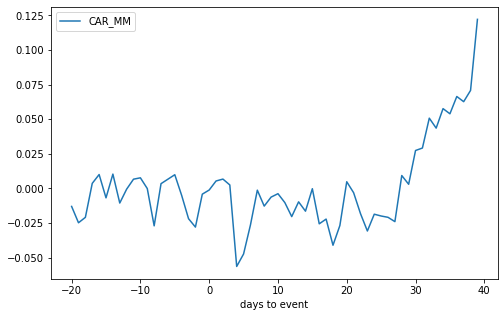

In [ ]:
returnsiocfinal.plot(x='days to event', y='CAR_MM',figsize=(8,5))

<AxesSubplot:xlabel='days to event'>

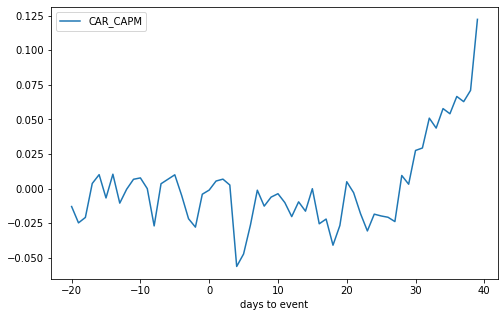

In [ ]:
returnsiocfinal.plot(x='days to event', y='CAR_CAPM',figsize=(8,5))

<AxesSubplot:xlabel='days to event'>

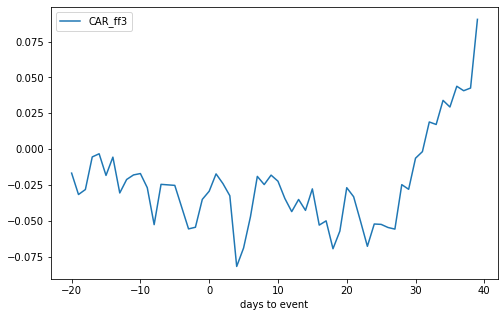

In [ ]:
returnsiocfinal.plot(x='days to event', y='CAR_ff3',figsize=(8,5))

<AxesSubplot:xlabel='days to event'>

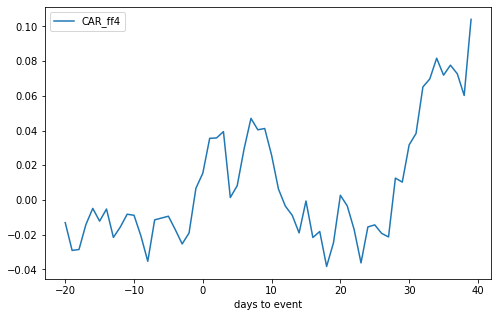

In [ ]:
returnsiocfinal.plot(x='days to event', y='CAR_ff4',figsize=(8,5))

Final Conclusions (Interpretation of above Graphs)

For all the 4 models, the figures suggest that the capital market perceives this event to be favourable for this particular security. At day 0, we see a upward movement and soon the company seems to fall back within the event window itself (0, 20 days) even on showing some improvements and then we some sort of stabilization but thats far from the day of event.